<a href="https://colab.research.google.com/github/cblankenback/bus007_final_assignment/blob/main/BUS_FINAL_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/cblankenback/bus007_final_assignment


https://www.kaggle.com/datasets/gregorut/videogamesales


By Baoshan Li, Christian Blankenback, Abdoul Kadir Ali, Stefan Vlajich, Dhary Salih

# BUS_007 FINAL ASSIGNMENT


## a. Introduction – 1 point (1%)


The dataset used in the BUS_FINAL_ASSIGNMENT.ipynb notebook is based on extensive data on video game sales and was obtained from Kaggle. With an extensive amount and diversity of variables provided for every video game entry, this dataset offers insights into the ever-changing gaming industry scene. The game's genre, platform, publisher, rank, sales numbers, year of release, and regional sales information are among its main characteristics.


There are 35,428 entries in the dataset; a different video game is represented by each row. The notebook's exploration of this dataset's many facets attempts to reveal trends, patterns, and important statistical data that can benefit companies and gaming enthusiasts alike. The notebook aims to extract meaningful information and reach conclusions about the variables influencing video game success, such as genre preferences, sales forecasts, and clustering patterns, through in-depth statistical analyses, machine learning models, and visualization techniques.


## b. Description of the Dataset – 2 points (1%) Stef, Kdee

 For our final project, we have chosen to use a videogame dataset. 11 columns are included in it:

**Rank** - Ranking of overall sales

**Name** - The games name

**Platform** - Platform of the games release (i.e. PC,PS4, etc.)

**Year** - Year of the game's release

**Genre** - Genre of the game

**Publisher** - Publisher of the game

**NA_Sales** - Sales in North America (in millions)

**EU_Sales** - Sales in Europe (in millions)

**JP_Sales** - Sales in Japan (in millions)

**Other_Sales** - Sales in the rest of the world (in millions)

**Global_Sales** - Total worldwide sales.




We can examine trends and patterns in the video game industry with the aid of this dataset.



After doing some simple cleaning:

* Area - The area (NA, EU, JP)
* Genre - Genre of the game
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Publisher - Publisher of the game
* SumofRank: add all the ranks add all the ranks (Ranking of overall sales) (Lower = better)​
* SumOfSales: all the sales added together
* Year

## c. Type of Graphs and observations – 4 points (2%) Stef, Kdee

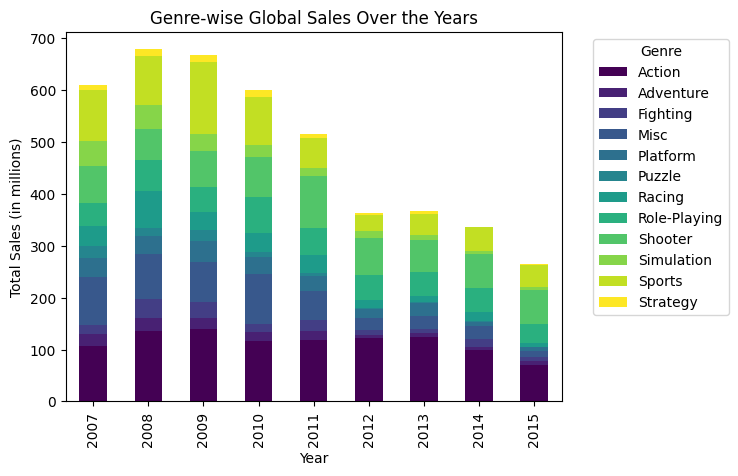

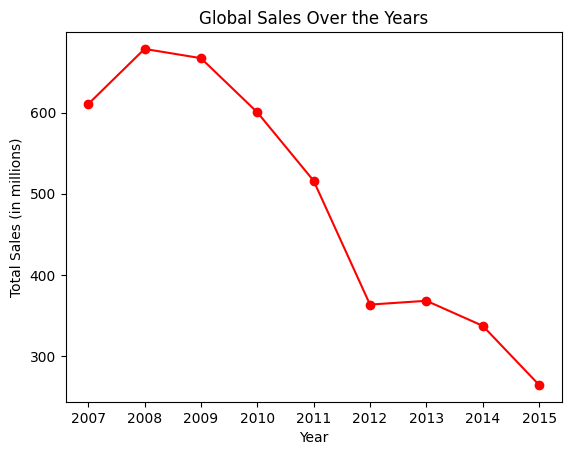

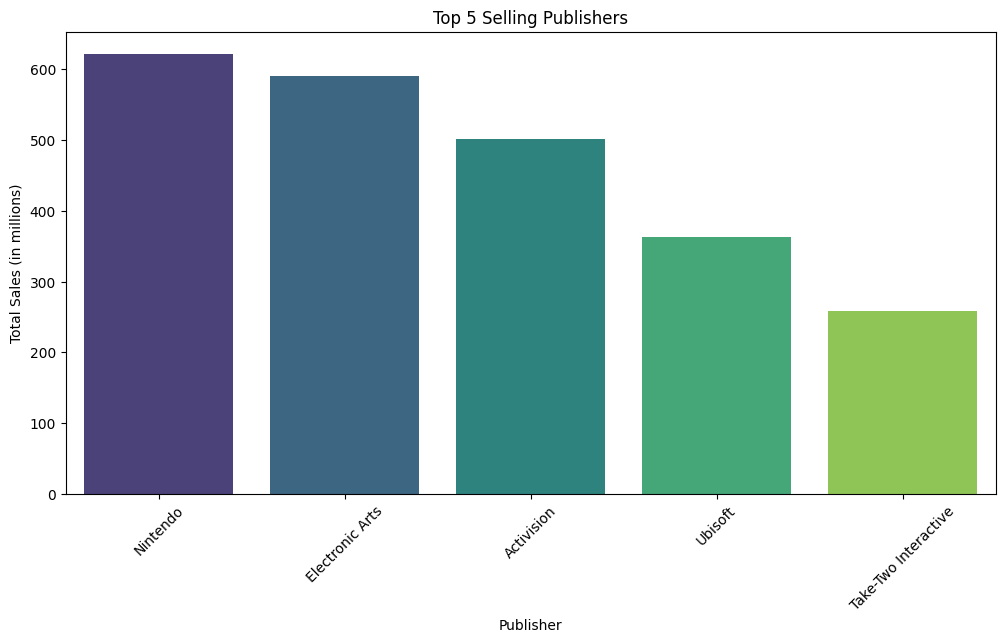

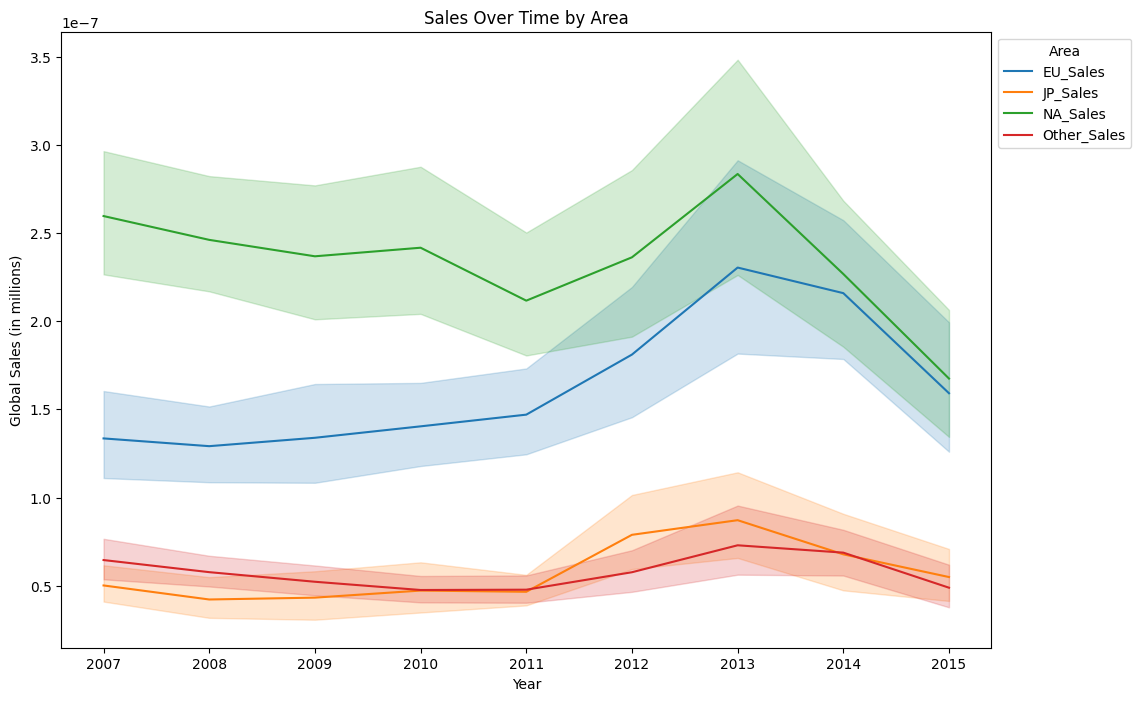

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import stats
warnings.filterwarnings("ignore")

df = pd.read_csv('video_game_data_all.csv')

df.head(5)

# Ceating which genre has highest global sales.
genre_sales = df.groupby(['Year', 'Genre'])['SumOfSales'].sum().unstack()

# Plotting
genre_sales.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Genre-wise Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## The Type of Graph we have used is the bar graph and the observation is figuring out what genre has the highest sales. ####

# Group by 'Year' and sum global sales for each year
year_sales = df.groupby('Year')['SumOfSales'].sum()

#Creating the third visualization.
year_sales.plot(kind='line', marker='o', color='red')
plt.title('Global Sales Over the Years')   #labelling the data.
plt.xlabel('Year')  #labelling the x-label.
plt.ylabel('Total Sales (in millions)') #labelling the y-label.
plt.show()

## The Type of graph we have used is the line graph and the oberservation is figuring out the global sales over the yea###

top_selling_publishers = df.groupby('Publisher')['SumOfSales'].sum().sort_values(ascending=False).head(5)

# Creating the second visualization.
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_publishers.index, y=top_selling_publishers.values, palette='viridis')
plt.title('Top 5 Selling Publishers')  # Labeling the data.
plt.xlabel('Publisher')  # Labeling the x-label.
plt.ylabel('Total Sales (in millions)')  # Labeling the y-label.

plt.xticks(rotation=45)
plt.show()

## The Type of graph we have used is the bar graph and the observation is which are the top 5 selling publishers. ###

# Create a line plot for each area
plt.figure(figsize=(12, 8))

# List of unique areas in the 'Area' column
areas = df['Area'].unique()

# Plot a line chart for each area
for area in areas:
    area_data = df[df['Area'] == area]

    # Convert 'SumOfSales' to millions
    area_data['SumOfSales'] = area_data['SumOfSales'] / 1_000_000

    sns.lineplot(x='Year', y='SumOfSales', data=area_data, label=area)

# Customize the plot
plt.title('Sales Over Time by Area')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Area', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Graph 1: We can observe that Action games have the most global sales while Strategy games have the least global sales.

Graph 2: We can observe that 2008 was the year with the most gobal sales while 2015 had to most global sales.

Graph 3: We can observe that Nintendo has the most amount of total sales while Take-Two Interactive has the least amount of total sales.

Graph 4: We can observe that NA has the most amount of global sales each year while JP and Other have the least amount of global sales each year.

## d. Descriptive Statistics – 2 points (1%) Measure of Central Tendency (Mean, Median, Mode), Dispersion, Outlier Detection, Missing Values Detection (SAM)

       Area   Genre                               Name Platform  \
0  EU_Sales  Action  .hack: Sekai no Mukou ni + Versus      PS3   
1  EU_Sales  Action                      [Prototype 2]       PC   
2  EU_Sales  Action                      [Prototype 2]      PS3   
3  EU_Sales  Action                      [Prototype 2]     X360   
4  EU_Sales  Action                   1001 Touch Games       DS   

            Publisher  SumofRank  SumOfSales  Year  
0  Namco Bandai Games      14279        0.00  2012  
1          Activision      10598        0.02  2012  
2          Activision       2742        0.28  2012  
3          Activision       2576        0.25  2012  
4           Avanquest       5538        0.17  2011  

Mean Sales: 0.12433555379925486
Median Sales: 0.01
Mode Sales: 0    0.0
Name: SumOfSales, dtype: float64

Standard Deviation of Sales: 0.43423235078269656
Range of Sales: 15.85

Outliers:
              Area     Genre                                Name Platform  \
2         EU_

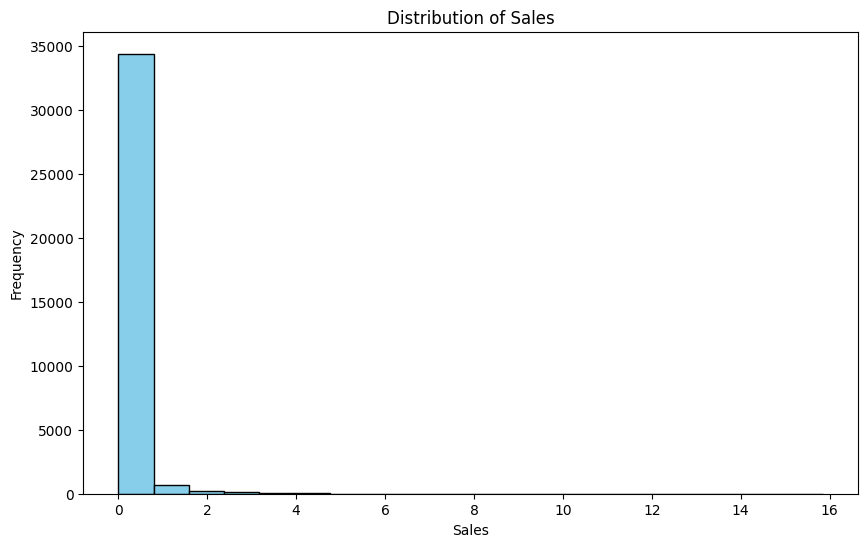

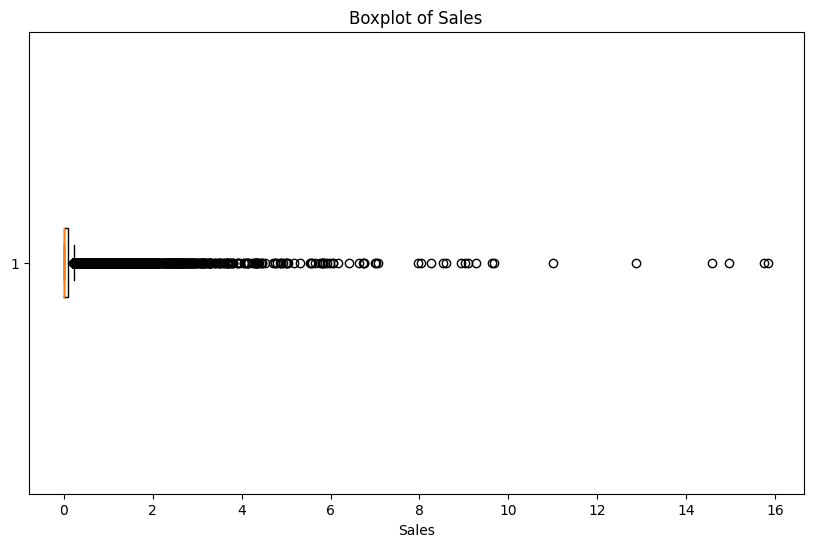

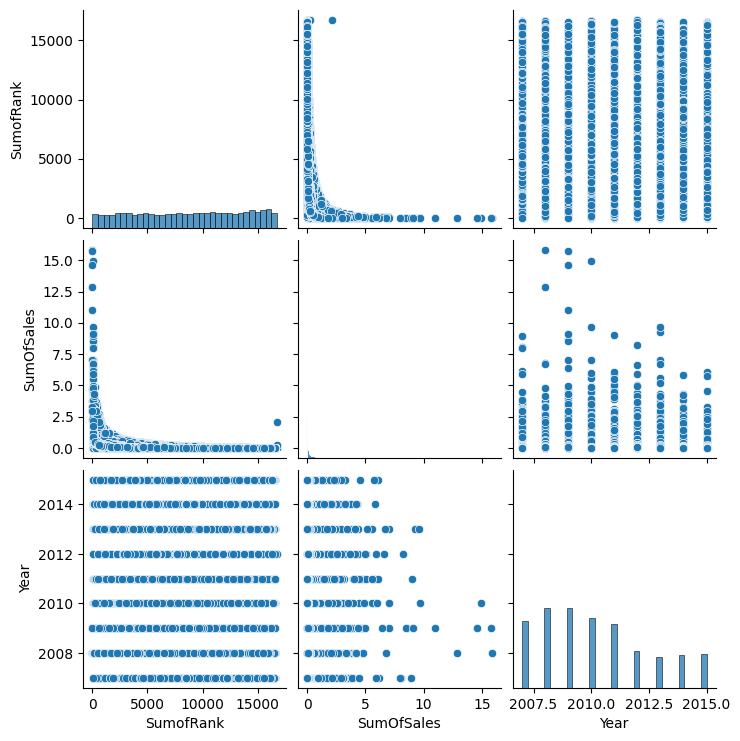

<Axes: xlabel='SumOfSales', ylabel='Count'>

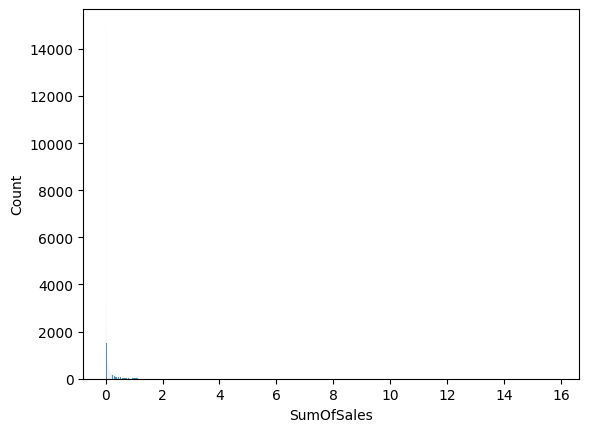

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is in a CSV file named 'video_game_sales.csv'
file_path = 'video_game_data_all.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Descriptive Statistics - Measure of Central Tendency
mean_sales = df['SumOfSales'].mean()
median_sales = df['SumOfSales'].median()
mode_sales = df['SumOfSales'].mode()

print(f"\nMean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")

# Dispersion
std_dev_sales = df['SumOfSales'].std()
range_sales = df['SumOfSales'].max() - df['SumOfSales'].min()

print(f"\nStandard Deviation of Sales: {std_dev_sales}")
print(f"Range of Sales: {range_sales}")

# Outlier Detection
Q1 = df['SumOfSales'].quantile(0.25)
Q3 = df['SumOfSales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['SumOfSales'] < lower_bound) | (df['SumOfSales'] > upper_bound)]

print("\nOutliers:")
print(outliers)

# Missing Values Detection
missing_values = df.isnull().sum()

print("\nMissing Values:")
print(missing_values)

# Visualizations
# Histogram for Sales Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['SumOfSales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Sales Distribution
plt.figure(figsize=(10, 6))
plt.boxplot(df['SumOfSales'], vert=False)
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()


sns.pairplot(df)

plt.show()

sns.histplot(df.SumOfSales)

## e. Predictive Statistics – 4 points (4%) Preprocessing steps, selecting the algorithm (classification, regression, clustering), selecting the evaluation method, results of evaluation. (Christian)

### **CLASSIFICATION**

Companies who make the most money always have an advantage. When developing anything it is important to know about your competition. If you are developing a game that is similar to another game you might want to predict the Genre of that game so you can understand temporal trends and make predictions about future releases.

>**Target Variable (y): "Genre"**

>**Features**


* Area
* Name - removed since rainforest does not work with it
* Platform
* Publisher
* SumofRank
* SumOfSales
* Year





####**Set Up**

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### **Reading the data**

In [106]:
df = pd.read_csv('video_game_data_all.csv')
df.head(5)

,Area,Genre,Name,Platform,Publisher,SumofRank,SumOfSales,Year
0,EU_Sales,Action,.hack: Sekai no Mukou ni + Versus,PS3,Namco Bandai Games,14279,0.00,2012
1,EU_Sales,Action,[Prototype 2],PC,Activision,10598,0.02,2012
2,EU_Sales,Action,[Prototype 2],PS3,Activision,2742,0.28,2012
3,EU_Sales,Action,[Prototype 2],X360,Activision,2576,0.25,2012
4,EU_Sales,Action,1001 Touch Games,DS,Avanquest,5538,0.17,2011


In [107]:
# check for number of rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35428 entries, 0 to 35427
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Name        35428 non-null  object 
 3   Platform    35428 non-null  object 
 4   Publisher   35388 non-null  object 
 5   SumofRank   35428 non-null  int64  
 6   SumOfSales  35428 non-null  float64
 7   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.2+ MB
None


**Values are not all equal data cleaning needed**

#### **Data cleaning**

In [108]:
# check the shape of the data before
print(df.shape)

# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(35428, 8)
(35428, 8)


No duplicates

Lets check to see how many publishers are missing

In [109]:
missing_values_publisher = df['Publisher'].isnull().sum()
print(f"Number of missing values in 'Publisher': {missing_values_publisher}")

Number of missing values in 'Publisher': 40


Since it is a small amount I will replace the missing with 'Unknown' and not drop it

In [110]:
# Replace missing values in the "Publisher" column with "Unknown"
df['Publisher'].fillna('Unknown', inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35428 entries, 0 to 35427
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Name        35428 non-null  object 
 3   Platform    35428 non-null  object 
 4   Publisher   35428 non-null  object 
 5   SumofRank   35428 non-null  int64  
 6   SumOfSales  35428 non-null  float64
 7   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ MB


Now all columns are **equal**!

Lets check for outliers

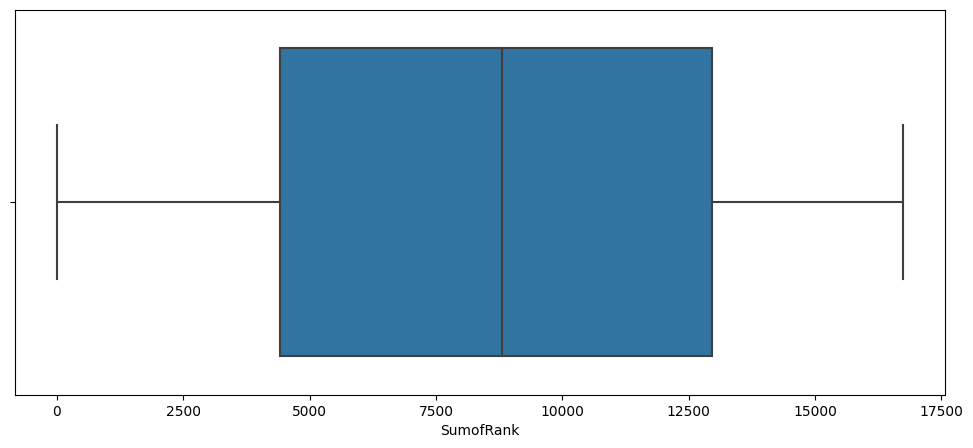

In [112]:
# Plot box plots for numerical columns
fig, axes = plt.subplots(1, figsize=(12, 5))
sns.boxplot(x='SumofRank', data=df)


plt.show()

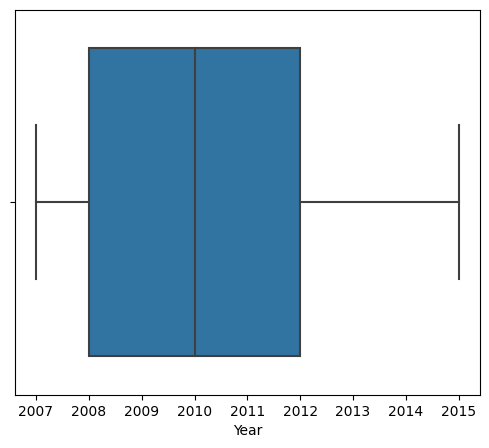

In [113]:
# Plot box plot for the "Year" column
plt.figure(figsize=(6, 5))
sns.boxplot(x='Year', data=df)
plt.show()

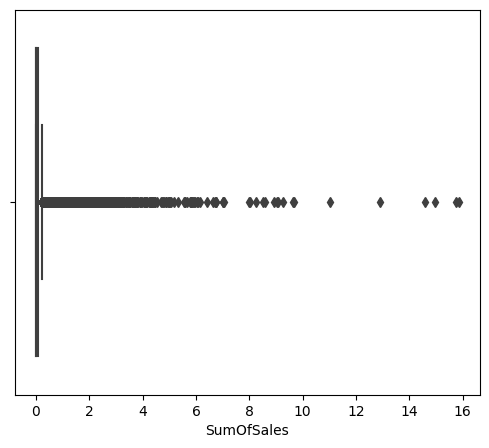

In [114]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='SumOfSales', data=df)
plt.show()

Does not look like there are any outliers in the first two. In the last one it appears there are outliers. I will try to remove these outliers

In [115]:
# Using a temp varible instead of df
sales_threshold = 3  # or any other threshold based on your analysis
dd = df[df['SumOfSales'] <= sales_threshold]

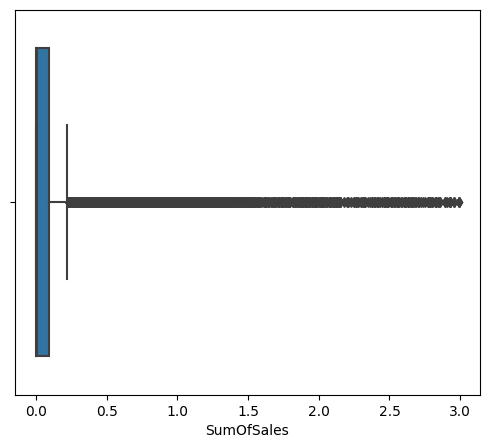

In [116]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='SumOfSales', data=dd)
plt.show()

Still lots of outliers, Random Forest is good at handling outliers so I will keep these outliers.

When doing random rainforest error it comes up with the coloumn 'name' so I will be dropping it

In [117]:
df = df.drop('Name', axis=1)

In [118]:
# Using a temp varible instead of df
sales_threshold = 1
df = df[df['SumOfSales'] <= sales_threshold]

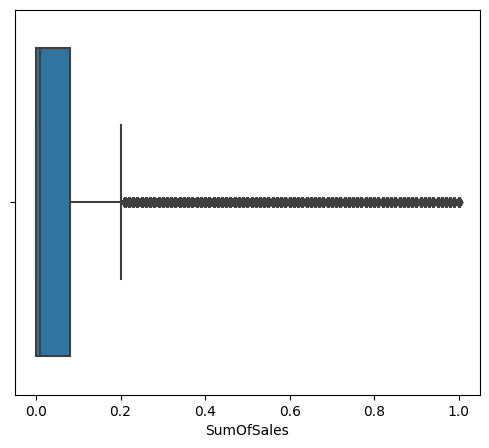

In [119]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='SumOfSales', data=df)
plt.show()

####**Encode**

In [120]:
df = pd.get_dummies(df, columns=['Area', 'Platform', 'Publisher'])

####**Data Partition**

In [121]:
# Features (X) and target variable (y)
X = df.drop('Genre', axis=1)
y = df['Genre']
# Display the first few rows of the input features and target variable
print("Input Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Input Features (X):
   SumofRank  SumOfSales  Year  Area_EU_Sales  Area_JP_Sales  Area_NA_Sales  \
0      14279        0.00  2012              1              0              0   
1      10598        0.02  2012              1              0              0   
2       2742        0.28  2012              1              0              0   
3       2576        0.25  2012              1              0              0   
4       5538        0.17  2011              1              0              0   

   Area_Other_Sales  Platform_3DS  Platform_DC  Platform_DS  ...  \
0                 0             0            0            0  ...   
1                 0             0            0            0  ...   
2                 0             0            0            0  ...   
3                 0             0            0            0  ...   
4                 0             0            0            1  ...   

   Publisher_Zoo Digital Publishing  Publisher_Zoo Games  \
0                                 0 

In [122]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# .2 = 20% used for testing the rest used for training

In [123]:
# Display the distribution of the target variable in the training set
print("\nDistribution of Target Variable in Training Set:")
print(y_train.value_counts(normalize=True))

# Display the distribution of the target variable in the testing set
print("\nDistribution of Target Variable in Testing Set:")
print(y_test.value_counts(normalize=True))

X_train.head()


Distribution of Target Variable in Training Set:
Action          0.227335
Misc            0.126578
Sports          0.121241
Adventure       0.102741
Role-Playing    0.093833
Shooter         0.067869
Simulation      0.060440
Racing          0.052362
Strategy        0.040534
Fighting        0.039272
Puzzle          0.037432
Platform        0.030364
Name: Genre, dtype: float64

Distribution of Target Variable in Testing Set:
Action          0.233232
Misc            0.124766
Sports          0.122314
Adventure       0.106592
Role-Playing    0.094043
Shooter         0.067647
Simulation      0.061013
Racing          0.053512
Fighting        0.037502
Puzzle          0.035915
Strategy        0.033175
Platform        0.030290
Name: Genre, dtype: float64


,SumofRank,SumOfSales,Year,Area_EU_Sales,Area_JP_Sales,Area_NA_Sales,Area_Other_Sales,Platform_3DS,Platform_DC,Platform_DS,...,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc"
816,14668,0.00,2012,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11454,8634,0.05,2014,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1202,5879,0.05,2014,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3267,11203,0.00,2010,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8522,11609,0.00,2010,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Distributions are simular and seem within reason

In [124]:
# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (27730, 372)
Shape of X_test: (6933, 372)
Shape of y_train: (27730,)
Shape of y_test: (6933,)


#### **Models**

####<font color="chocolate">**Random Forest**

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display a classification report for more detailed metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

      Action       0.52      0.56      0.54      1617
   Adventure       0.64      0.60      0.62       739
    Fighting       0.46      0.43      0.45       260
        Misc       0.47      0.48      0.48       865
    Platform       0.32      0.22      0.26       210
      Puzzle       0.53      0.45      0.49       249
      Racing       0.42      0.37      0.39       371
Role-Playing       0.58      0.57      0.57       652
     Shooter       0.40      0.35      0.37       469
  Simulation       0.44      0.41      0.42       423
      Sports       0.49      0.57      0.53       848
    Strategy       0.32      0.32      0.32       230

    accuracy                           0.50      6933
   macro avg       0.46      0.45      0.45      6933
weighted avg       0.50      0.50      0.50      6933



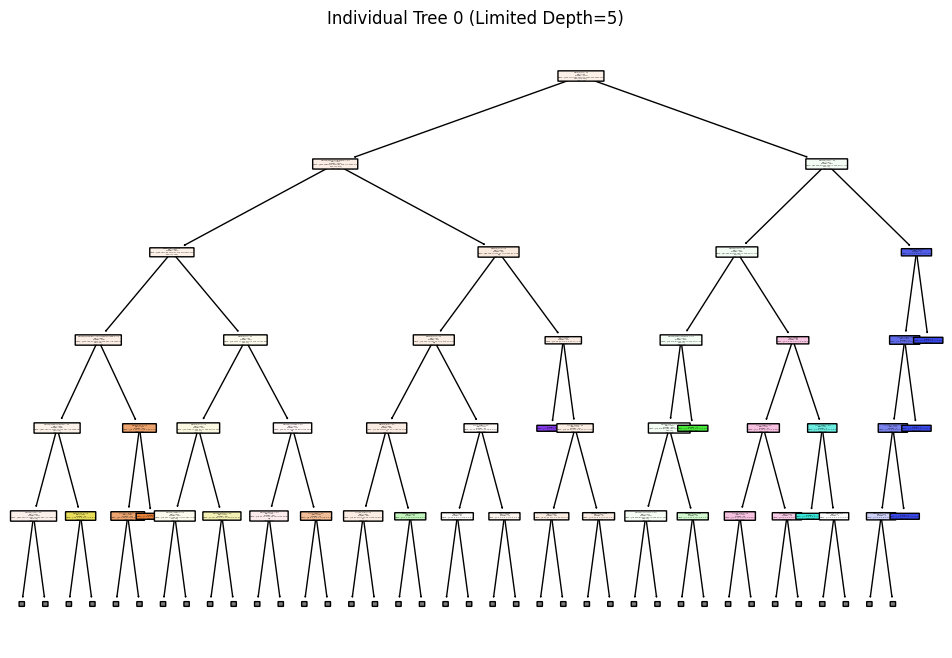

In [126]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model
tree_index = 0  # Change this to the index of the tree you want to visualize

# Access the tree at the specified index from the Random Forest model
individual_tree = rf_model.estimators_[tree_index]

# Plot the tree with a limited depth (e.g., 3 levels)
plt.figure(figsize=(12, 8))
plot_tree(individual_tree, filled=True, feature_names=X_train.columns, class_names=True, rounded=True, max_depth=5)
plt.title(f'Individual Tree {tree_index} (Limited Depth=5)')
plt.show()

Lets test it should get it right 50% of the time

In [127]:
new = df.drop('Genre', axis=1).iloc[5000:5001]

print(df.loc[5000, 'Genre'])

Action


In [128]:


# Make predictions for the new game
new_game_prediction = rf_model.predict(new)

# Display the predicted genre for the new game
print(f'Predicted Genre for the New Game: {new_game_prediction[0]}')

Predicted Genre for the New Game: Action


As you can see it was right!

####<font color="chocolate">**Logistic Regression**

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)  # You can adjust max_iter based on your data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print(f'Accuracy of Logistic Regression: {accuracy_logistic:.2f}\n')

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

Accuracy of Logistic Regression: 0.25

Classification Report:
              precision    recall  f1-score   support

      Action       0.25      0.87      0.38      1617
   Adventure       0.26      0.44      0.33       739
    Fighting       0.00      0.00      0.00       260
        Misc       0.00      0.00      0.00       865
    Platform       0.00      0.00      0.00       210
      Puzzle       0.00      0.00      0.00       249
      Racing       0.00      0.00      0.00       371
Role-Playing       0.00      0.00      0.00       652
     Shooter       0.00      0.00      0.00       469
  Simulation       0.00      0.00      0.00       423
      Sports       0.00      0.00      0.00       848
    Strategy       0.00      0.00      0.00       230

    accuracy                           0.25      6933
   macro avg       0.04      0.11      0.06      6933
weighted avg       0.09      0.25      0.12      6933


Confusion Matrix:
[[1404  213    0    0    0    0    0    0    0    0 

This one only 23% accurate

### **REGRESSION**

Predicting future sales is critical for businesses as it provides essential insights for effective planning and decision-making. Accurate sales forecasts facilitate demand planning, allowing businesses to optimize inventory levels, allocate resources efficiently, and make informed financial decisions.

>**Target Variable (y): "SumOfSales"**

>**Features**


* Area
* Genre
* Platform
* Publisher
* SumofRank
* Year

In [130]:
sales_threshold = 1 # or any other threshold based on your analysis USED IN OUTLIER

####**Step Up**

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### **Reading the data**

In [132]:
df = pd.read_csv('video_game_data_all.csv')
dd = pd.read_csv('video_game_data_all.csv')
df.head(5)

,Area,Genre,Name,Platform,Publisher,SumofRank,SumOfSales,Year
0,EU_Sales,Action,.hack: Sekai no Mukou ni + Versus,PS3,Namco Bandai Games,14279,0.00,2012
1,EU_Sales,Action,[Prototype 2],PC,Activision,10598,0.02,2012
2,EU_Sales,Action,[Prototype 2],PS3,Activision,2742,0.28,2012
3,EU_Sales,Action,[Prototype 2],X360,Activision,2576,0.25,2012
4,EU_Sales,Action,1001 Touch Games,DS,Avanquest,5538,0.17,2011


In [133]:
# check for number of rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35428 entries, 0 to 35427
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Name        35428 non-null  object 
 3   Platform    35428 non-null  object 
 4   Publisher   35388 non-null  object 
 5   SumofRank   35428 non-null  int64  
 6   SumOfSales  35428 non-null  float64
 7   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.2+ MB
None


**Values are not all equal data cleaning needed**

#### **Data cleaning**

In [134]:
# check the shape of the data before
print(df.shape)

# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(35428, 8)
(35428, 8)


No duplicates

Lets check to see how many publishers are missing

In [135]:
missing_values_publisher = df['Publisher'].isnull().sum()
print(f"Number of missing values in 'Publisher': {missing_values_publisher}")

Number of missing values in 'Publisher': 40


Since it is a small amount I will replace the missing with 'Unknown' and not drop it

In [136]:
# Replace missing values in the "Publisher" column with "Unknown"
df['Publisher'].fillna('Unknown', inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35428 entries, 0 to 35427
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Name        35428 non-null  object 
 3   Platform    35428 non-null  object 
 4   Publisher   35428 non-null  object 
 5   SumofRank   35428 non-null  int64  
 6   SumOfSales  35428 non-null  float64
 7   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ MB


Now all columns are **equal**!

Linear does not need 'Name' so I will drop it

In [138]:
df.drop('Name', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35428 entries, 0 to 35427
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Platform    35428 non-null  object 
 3   Publisher   35428 non-null  object 
 4   SumofRank   35428 non-null  int64  
 5   SumOfSales  35428 non-null  float64
 6   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.2+ MB


Lets check for outliers

####**Outliers**

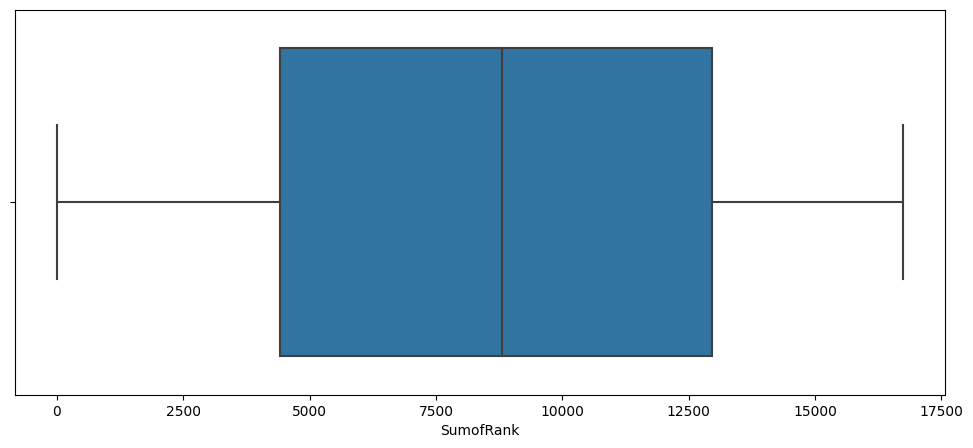

In [139]:
# Plot box plots for numerical columns
fig, axes = plt.subplots(1, figsize=(12, 5))
sns.boxplot(x='SumofRank', data=df)


plt.show()

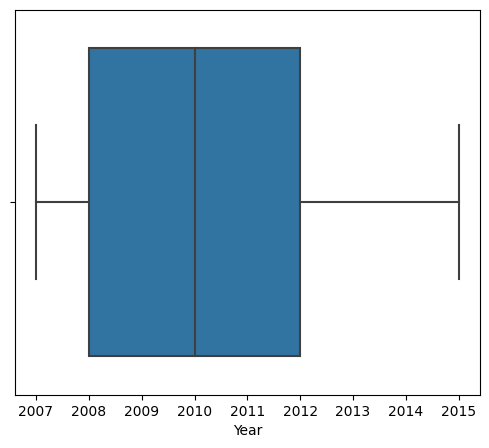

In [140]:
# Plot box plot for the "Year" column
plt.figure(figsize=(6, 5))
sns.boxplot(x='Year', data=df)
plt.show()

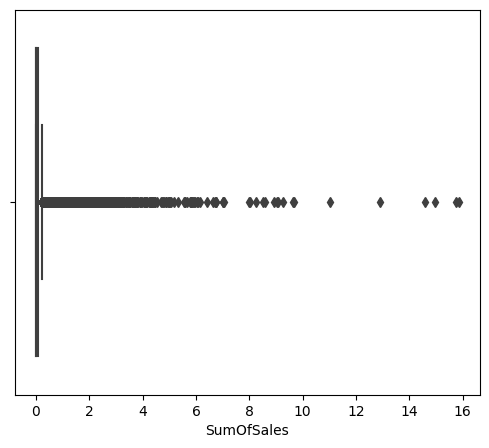

In [141]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='SumOfSales', data=df)
plt.show()

Does not look like there are any outliers in the first two. In the last one it appears there are outliers. I will try to remove these outliers

In [142]:
# Using a temp varible instead of df
# Sales_threshold is at the top of this section to make it easier to test
df = df[df['SumOfSales'] <= sales_threshold]

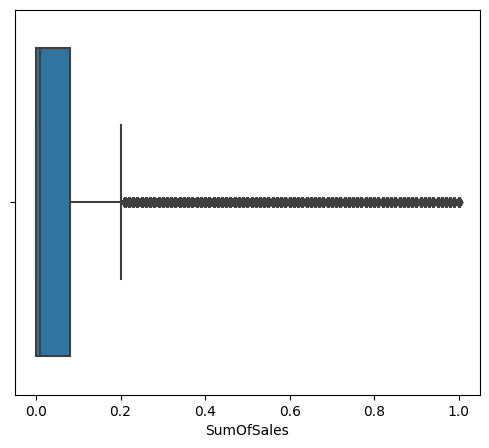

In [143]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='SumOfSales', data=df)
plt.show()

####**Encode**

In [144]:
df = pd.get_dummies(df, columns=['Genre','Area', 'Platform', 'Publisher'])
print(df.head())
print(df.info())

   SumofRank  SumOfSales  Year  Genre_Action  Genre_Adventure  Genre_Fighting  \
0      14279        0.00  2012             1                0               0   
1      10598        0.02  2012             1                0               0   
2       2742        0.28  2012             1                0               0   
3       2576        0.25  2012             1                0               0   
4       5538        0.17  2011             1                0               0   

   Genre_Misc  Genre_Platform  Genre_Puzzle  Genre_Racing  ...  \
0           0               0             0             0  ...   
1           0               0             0             0  ...   
2           0               0             0             0  ...   
3           0               0             0             0  ...   
4           0               0             0             0  ...   

   Publisher_Zoo Digital Publishing  Publisher_Zoo Games  \
0                                 0                    0

####**Feature Selection/Target Variable**

In [145]:
# Features: Include one-hot encoded columns, 'SumofRank', 'Year'
features = df[['SumofRank', 'Year'] + [col for col in df.columns if col.startswith('Genre_') or col.startswith('Area_') or col.startswith('Platform_') or col.startswith('Publisher_')]]

# Target: 'SumOfSales'
target = df['SumOfSales']


####**Model**

In [146]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [147]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [148]:
# Create and train the linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [149]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [150]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0139201601984153
R-squared: 0.3930343058629038


####**Visualization**

5000    Dead Island
Name: Name, dtype: object


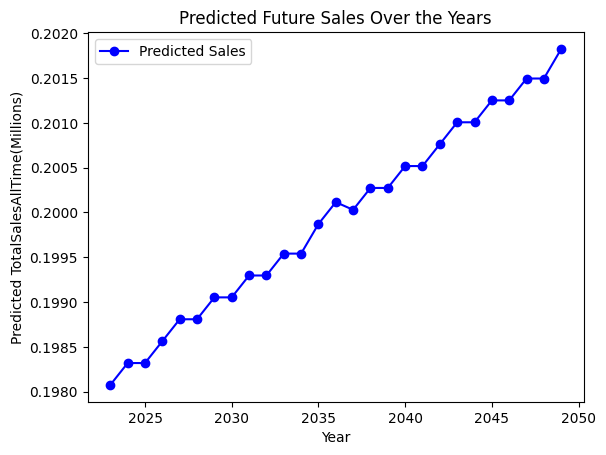

In [151]:
import numpy as np

# Assuming you want to predict for a range of years
future_years = np.arange(2023, 2050, 1)  # Adjust the range as needed

# Create a DataFrame with future years
future_data = df.iloc[5000:5001].copy()
print(dd.iloc[5000:5001].Name)
# Drop the 'SumOfSales' column if needed
future_data.drop('SumOfSales', axis=1, inplace=True)

# Repeat the row for each year in the future_years array
future_data = pd.concat([future_data]*len(future_years), ignore_index=True)

# Assign the 'Year' values to the future_data DataFrame
future_data['Year'] = future_years

# Standardize the features of your future data using the same scaler
future_data_scaled = scaler.transform(future_data)

# Make predictions for future sales
future_sales_predictions = model.predict(future_data_scaled)

# Visualize the predicted future sales
plt.plot(future_data['Year'], future_sales_predictions, marker='o', linestyle='-', color='b', label='Predicted Sales')
plt.xlabel('Year')
plt.ylabel('Predicted TotalSalesAllTime(Millions)')
plt.title('Predicted Future Sales Over the Years')
plt.legend()
plt.show()


### **CLUSTERING**

Clusters to inform decisions about new product development. Understanding the preferences of each cluster can guide decisions about what features or genres to focus on.

####**Step Up**

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### **Reading the data**

In [153]:
df = pd.read_csv('video_game_data_all.csv')
df.head(5)

,Area,Genre,Name,Platform,Publisher,SumofRank,SumOfSales,Year
0,EU_Sales,Action,.hack: Sekai no Mukou ni + Versus,PS3,Namco Bandai Games,14279,0.00,2012
1,EU_Sales,Action,[Prototype 2],PC,Activision,10598,0.02,2012
2,EU_Sales,Action,[Prototype 2],PS3,Activision,2742,0.28,2012
3,EU_Sales,Action,[Prototype 2],X360,Activision,2576,0.25,2012
4,EU_Sales,Action,1001 Touch Games,DS,Avanquest,5538,0.17,2011


In [154]:
# check for number of rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35428 entries, 0 to 35427
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Name        35428 non-null  object 
 3   Platform    35428 non-null  object 
 4   Publisher   35388 non-null  object 
 5   SumofRank   35428 non-null  int64  
 6   SumOfSales  35428 non-null  float64
 7   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.2+ MB
None


####**Model**

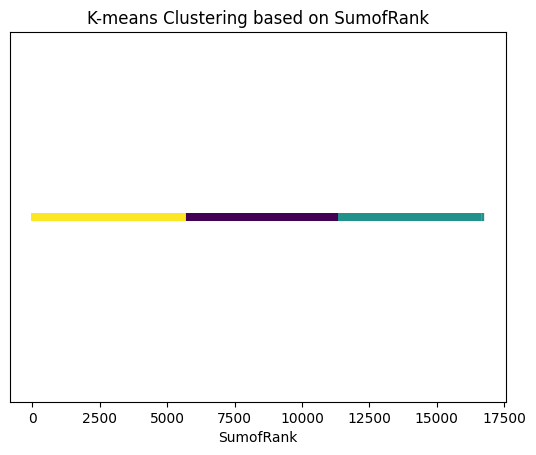

In [155]:
# Assuming your data is in a DataFrame named 'df'
# Selecting the feature for clustering
X = df[['SumofRank']]

# Specify the number of clusters (you can adjust this based on your problem)
num_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the original DataFrame
df['Cluster_SumofRank'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['SumofRank'], [0] * len(df), c=df['Cluster_SumofRank'], cmap='viridis', marker='|')
plt.title('K-means Clustering based on SumofRank')
plt.xlabel('SumofRank')
plt.yticks([])
plt.show()

In [156]:
cluster_analysis = df.groupby('Cluster_SumofRank').mean()
print(cluster_analysis)

                      SumofRank  SumOfSales         Year
Cluster_SumofRank                                       
0                   8591.326319    0.042946  2010.099345
1                  14090.975073    0.009654  2010.304306
2                   2895.416870    0.330052  2010.127571


* **Cluster 0:**

Moderate "SumofRank" and "SumOfSales."
Games in this cluster seem to have a decent ranking, moderate sales, and are from around 2010.
* **Cluster 1:**

High "SumofRank" but very low "SumOfSales."
Games in this cluster have high rankings but low sales. The average year is slightly later than Cluster 0.
* **Cluster 2:**

Low "SumofRank" and high "SumOfSales."
Games in this cluster have lower rankings but higher sales, and they are from around 2010.

## f. Conclusion and Recommendations – 2 points (1%)

* From this seems like action games are game we should invest in.
* We can also see that North America is where we should focus our advertising.
* It seems like EU sales are not very high so we should spend more time advertising to NA and EU
* PS4 platform has better prospects, and we should develop more games on the PS4 platform in the future.
